In [90]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm


import matplotlib.pyplot as plt
plt.ion()

import scipy
from PIL import Image
from scipy import ndimage

    
    
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis


In [179]:
OLD
#Setup Basic Training Data Set (fill in more later)

#Training Data (X)
fname = "data/train_yes/AB001r.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
#my_image1 = image.reshape(1, 512*512*3).T
my_image2 = image.reshape(512*512*3, 1)
#Flatten
my_image2_flat = my_image2/255


plt.imshow(image)
#print(my_image1)
print(my_image2_flat.shape)
print(my_image2_flat)


#Training Data (Y)
train_set_y = (np.array ([1, 1, 0])).reshape(1,-1)
print (train_set_y.shape)



NameError: name 'OLD' is not defined

Working with 22 images
Image examples: 
0_n10.JPG


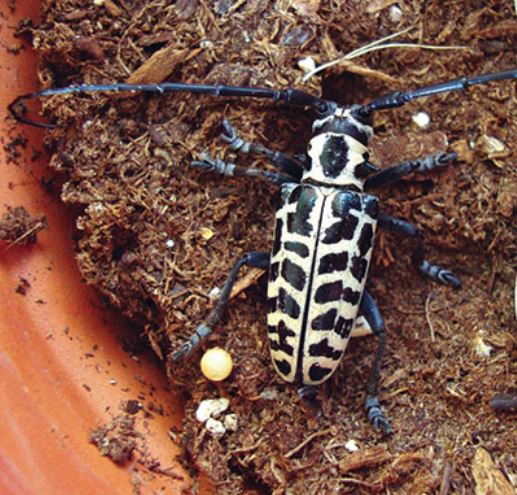

0_n11.JPG


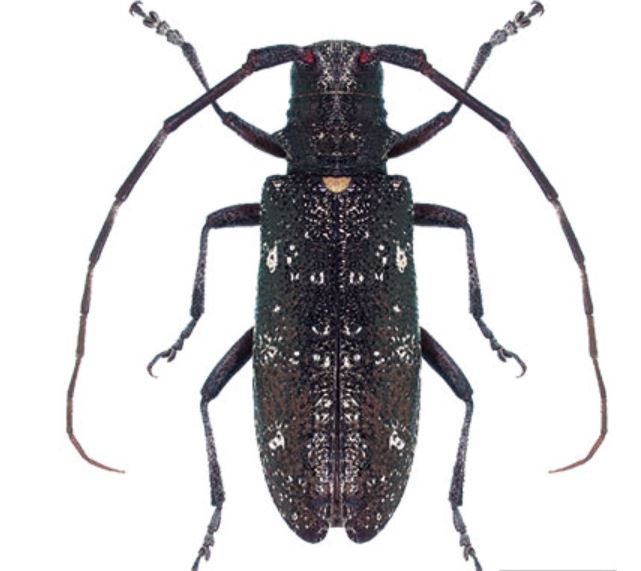

Files in train_files: 22


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


All images to array!
dataset shape = (786432, 22)
y_train_vector shape = (1, 22)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]]


In [181]:
#Load data second try
folder = "data/train_yes"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(1, 3):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=512, height=512))
    
#populate x & y lists for processing
train_files = []
y_train = []
for _file in onlyfiles:
    train_files.append(_file)
    y_train.append(int(_file[0]))  #grab y from first character of filename

#Clean up some shapes    
v_size = len(train_files)
y_train_vector = (np.array (y_train)).reshape(1,v_size) 

print("Files in train_files: %d" % v_size)

#Define empty array to add images
dataset = np.ndarray(shape=(v_size, 512*512*3), dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    
    resize_img = scipy.misc.imresize(img, size=(512,512))
    x_ar = img_to_array(resize_img)
    flat_image = x_ar.reshape(1, 512*512*3)
    dataset[i] = flat_image
    i += 1

    
#Reformat the dataset and flatten (/255)    
dataset = dataset.T/255

print("All images to array!")
print ("dataset shape = " + str (dataset.shape))
print ("y_train_vector shape = " + str (y_train_vector.shape))   
print (y_train_vector)

In [182]:
print (y_train_vector)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]]


In [35]:
sess = tf.InteractiveSession()

In [206]:
## Input pixels, flattened
x = tf.placeholder("float", [786432, None])
## Known labels
y = tf.placeholder("float", [1, None])
#Y_prediction = tf.placeholder("float", [1, None])

# Variables
W = tf.Variable(tf.zeros([1, 786432]))
b = tf.Variable(tf.zeros([1]))

# Just initialize
sess.run(tf.initialize_all_variables())

In [214]:
# Just initialize
sess.run(tf.initialize_all_variables())

In [207]:
# Define model
z = tf.add(tf.matmul(W, x),b)
A = tf.sigmoid(z)

#m = y.shape[1]
#Y_prediction = np.zeros((1,m))

#for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
#        Y_prediction[0,i] = np.where(A[0,i]>0.5,1,0)

print ("A is: " + str(A.shape))
print ("W is: " + str(W.shape))
print ("x is: " + str(x.shape))
print ("z is: " + str(z.shape))
print ("y is: " + str(y.shape))
print ("Y_prediction is: " + str(Y_prediction.shape))
print(b)


A is: (1, ?)
W is: (1, 786432)
x is: (786432, ?)
z is: (1, ?)
y is: (1, ?)
Y_prediction is: (1, ?)
<tf.Variable 'Variable_25:0' shape=(1,) dtype=float32_ref>


In [208]:
# Cost function
#cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,  labels = y)
cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= z, labels= y))

# How we train (GradientDescent)
train_step = tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)

# Define accuracy
#correct_prediction = tf.equal(y, y_)
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [219]:
# Actually train
epochs = 200

print_cost = True
costs = []

# Actual Prediction
prediction = tf.round(tf.sigmoid(z))
predictions_correct = tf.cast(tf.equal(prediction, y_train_vector), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

train_acc = []
test_acc = []

#train_acc = np.zeros(epochs//10)
#test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs)):
    train_step.run(feed_dict={x: dataset, y: y_train_vector})
    
    temp_cost = sess.run(cross_entropy, feed_dict={x: dataset, y: y_train_vector})
    costs.append(temp_cost)
    
    temp_acc_train = sess.run(accuracy, feed_dict={x: dataset, y: y_train_vector})
    train_acc.append(temp_acc_train)
    
    # Record summary data, and the accuracy
    #if i % 10 == 0:
        # Check accuracy on train set
        #A = accuracy.eval(feed_dict={
        #x: train_set_x.reshape([-1, 12288]),
        #    x: train_set_x,
        #    y_: train_set_y_orig
        #})
     #   train_acc[i//10] = A
        # And now the validation set
  #      A = accuracy.eval(feed_dict={
  #          #x: test.reshape([-1,1296]),
  #          x: test_set_x,
  #          y_: test_set_y_orig
  #      })
  #      test_acc[i//10] = A
    
      #  train_step.run(feed_dict={
     #   x: dataset,
    #    y: y_train_vector
   #     })
    # Record the costs (not working right)
  #  if i % 100 == 0:
   #     costs.append(cross_entropy)
  #      print (cross_entropy)
    #not working right
    # Print the cost every 100 training iterations
    #if print_cost and i % 100 == 0:
    #print ("Cost after iteration %i: %f" %(i, cross_entropy))
    #print (A.shape)
    #next!!!!!!!!!
    #for i in range(sess.run(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
    #    Y_prediction[0,i] = np.where(A[0,i]>0.5,1,0)

100%|████████████████████████████████████████| 200/200 [00:48<00:00,  4.11it/s]


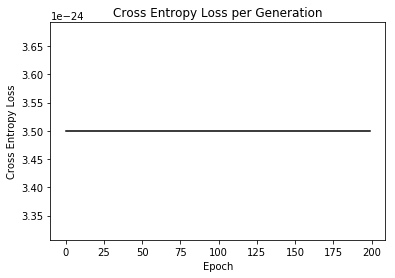

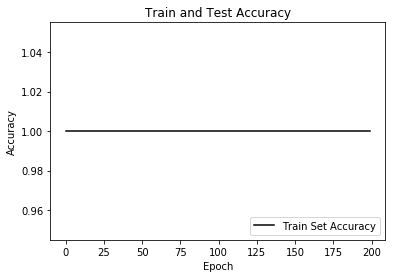

In [220]:
# Plot loss over time
plt.plot(costs, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
#plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [204]:
W.eval()

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [211]:
print (costs)

[343.84894, 173.10846, 254.36996, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24, 3.499603e-24]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


The Algo says [[0.]]
[[-33236.203]]


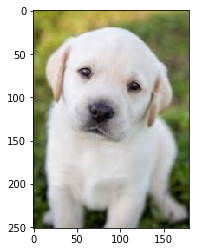

In [200]:
#Test Image 
#fname = "data/train_yes/AB006.jpg"
fname = "data/train_yes/0_puppy.jpg"
#fname = "data/test/0_puppy2.JPG"
image = np.array(ndimage.imread(fname, flatten=False))
resized_image = scipy.misc.imresize(image, size=(512,512))
my_image = resized_image.reshape((1, 512*512*3)).T


print ("The Algo says " + str(A.eval({x:my_image})))
print (z.eval({x:my_image}))
plt.imshow(image)

#print (W)

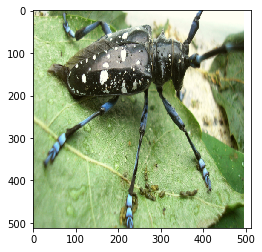

In [70]:
plt.imshow(resized_image)

In [ ]:
Next
Done   1. Add cost graph

Next graph out train set accuracy


2. calc train set accuracy, maybe graph? can add a test set later
2. add more data (0 and 1)
2. need a train and test set (look in kagel for example? or just hard code)